In [1]:
import os
import subprocess


In [2]:
SOURCE_DIR = os.path.abspath(os.path.join(os.getcwd(), '../VALDO_Dataset/Task2'))
LABEL_NAME = '_space-T2S_CMB.nii.gz'
ID_FNAME = '_space-T2S_desc-masked_T2S.nii.gz'

In [3]:
def get_labels_and_ids():
    labels = []
    ids = []
    
    folders = [item for item in os.listdir(SOURCE_DIR) if os.path.isdir(os.path.join(SOURCE_DIR, item))]
    
    for folder in folders:
        folder_path = os.path.join(SOURCE_DIR, folder)
        files = os.listdir(folder_path)
        
        label_file = next((f for f in files if f.startswith('sub-') and f.endswith(LABEL_NAME)), None)
        if label_file:
            labels.append(os.path.join(folder_path, label_file))
            
        id_file = next((f for f in files if f.startswith('sub-') and f.endswith(ID_FNAME)), None)
        if id_file:
            ids.append(os.path.join(folder_path, id_file))
            
    return labels, ids

In [4]:
labels, ids = get_labels_and_ids()  

In [5]:
print(f'Number of labels: {len(labels)}\nNumber of ids: {len(ids)}')

Number of labels: 72
Number of ids: 72


In [6]:
DATASET_DIR = os.path.abspath(os.path.join(os.getcwd(), '../Dataset/VALDO_dataset'))

if not os.path.exists(DATASET_DIR):
    os.makedirs(DATASET_DIR)
    
DATASET_DIR

'c:\\Users\\nigel\\Documents\\Thesis\\Dataset\\VALDO_dataset'

In [7]:
MRI_T2S_DIR = f'{DATASET_DIR}/mri_t2s_dir'

if not os.path.exists(MRI_T2S_DIR):
    os.makedirs(MRI_T2S_DIR)
    
MRI_T2S_DIR

'c:\\Users\\nigel\\Documents\\Thesis\\Dataset\\VALDO_dataset/mri_t2s_dir'

In [8]:
CMB_MASKS_DIR = f'{DATASET_DIR}/cmb_masks_dir'

if not os.path.exists(CMB_MASKS_DIR):
    os.makedirs(CMB_MASKS_DIR)
    
CMB_MASKS_DIR

'c:\\Users\\nigel\\Documents\\Thesis\\Dataset\\VALDO_dataset/cmb_masks_dir'

In [9]:
PREPROCESSED_DIR = f'{DATASET_DIR}/preprocessed_dir'

if not os.path.exists(PREPROCESSED_DIR):
    os.makedirs(PREPROCESSED_DIR)
    
PREPROCESSED_DIR

'c:\\Users\\nigel\\Documents\\Thesis\\Dataset\\VALDO_dataset/preprocessed_dir'

In [10]:
synthstrip_docker = "freesurfer/synthstrip"

In [11]:
# CHANGE THIS IF YOU HAVE DIFFERENT DOCKER PATH
DOCKER_PATH = "C:\\Program Files\\Docker\\Docker\\resources\\bin\\docker.exe"

In [12]:
# Process each MRI scan using SynthStrip
for label_path, id_path in zip(labels, ids):
    label_name = os.path.basename(label_path)
    id_name = os.path.basename(id_path)
    
    # copies the CMB masks files in another folder
    cmb_path = os.path.join(CMB_MASKS_DIR, label_name)
    os.system(f'copy "{label_path}" "{cmb_path}"')
    
    # copies the MRI T2S files in another folder
    mri_path = os.path.join(MRI_T2S_DIR, id_name)
    os.system(f'copy "{id_path}" "{mri_path}"')    
    
    print(f"Processing file: {mri_path}")
    
    # Docker command for running the SynthStrip 
    docker_command = [
        DOCKER_PATH, "run", "--rm",
        "-v", f"{MRI_T2S_DIR}:/input",
        "-v", f"{PREPROCESSED_DIR}:/output",
        synthstrip_docker,
        "-i", f"/input/{id_name}",
        f"-o", f"/output/{id_name.replace('.nii.gz', '_stripped.nii.gz')}"
    ]
    
    subprocess.run(docker_command, shell=True, capture_output=True, text=True)
    print(f"Copied and processed {id_name}")
    print(f"Copied {label_name}\n")

Processing file: c:\Users\nigel\Documents\Thesis\Dataset\VALDO_dataset/mri_t2s_dir\sub-101_space-T2S_desc-masked_T2S.nii.gz
Copied and processed sub-101_space-T2S_desc-masked_T2S.nii.gz
Copied sub-101_space-T2S_CMB.nii.gz

Processing file: c:\Users\nigel\Documents\Thesis\Dataset\VALDO_dataset/mri_t2s_dir\sub-102_space-T2S_desc-masked_T2S.nii.gz
Copied and processed sub-102_space-T2S_desc-masked_T2S.nii.gz
Copied sub-102_space-T2S_CMB.nii.gz

Processing file: c:\Users\nigel\Documents\Thesis\Dataset\VALDO_dataset/mri_t2s_dir\sub-103_space-T2S_desc-masked_T2S.nii.gz
Copied and processed sub-103_space-T2S_desc-masked_T2S.nii.gz
Copied sub-103_space-T2S_CMB.nii.gz

Processing file: c:\Users\nigel\Documents\Thesis\Dataset\VALDO_dataset/mri_t2s_dir\sub-104_space-T2S_desc-masked_T2S.nii.gz
Copied and processed sub-104_space-T2S_desc-masked_T2S.nii.gz
Copied sub-104_space-T2S_CMB.nii.gz

Processing file: c:\Users\nigel\Documents\Thesis\Dataset\VALDO_dataset/mri_t2s_dir\sub-105_space-T2S_desc-ma

In [13]:
os.listdir(PREPROCESSED_DIR)

['sub-101_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-102_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-103_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-104_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-105_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-106_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-107_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-108_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-109_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-110_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-111_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-201_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-202_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-203_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-204_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-205_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-206_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-207_space-T2S_desc-masked_T2S_stripped.nii.gz',
 'sub-208_space-T2S_desc-mas

In [14]:
from project.utils import plot_all_slices, plot_mri_slice

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.16 (you have 1.4.10). Upgrade using: pip install --upgrade albumentations


In [15]:
raw_mri_list = [os.path.join(MRI_T2S_DIR, f) for f in os.listdir(MRI_T2S_DIR) if os.path.isfile(os.path.join(MRI_T2S_DIR, f))]
cmb_masks_list = [os.path.join(CMB_MASKS_DIR, f) for f in os.listdir(CMB_MASKS_DIR) if os.path.isfile(os.path.join(CMB_MASKS_DIR, f))]
preprocessed_mri_list = [os.path.join(PREPROCESSED_DIR, f) for f in os.listdir(PREPROCESSED_DIR) if os.path.isfile(os.path.join(PREPROCESSED_DIR, f))]

### MRI slice sample from Cohort 1


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


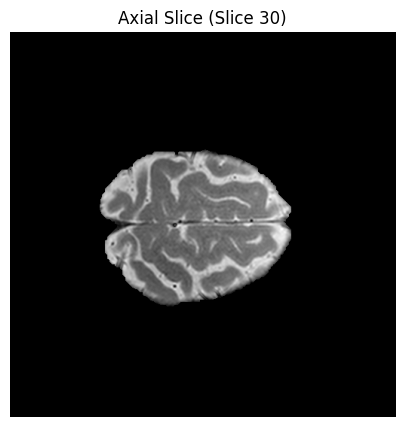

In [16]:
plot_mri_slice(raw_mri_list[0])

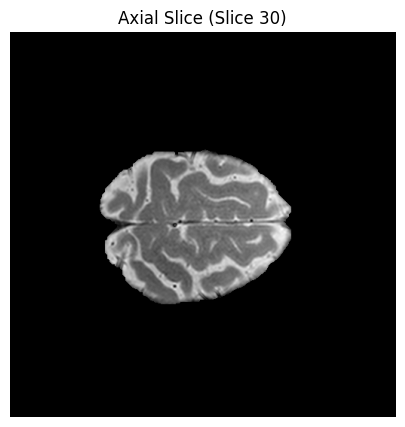

In [17]:
plot_mri_slice(preprocessed_mri_list[0])

### MRI slice sample from Cohort 2


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


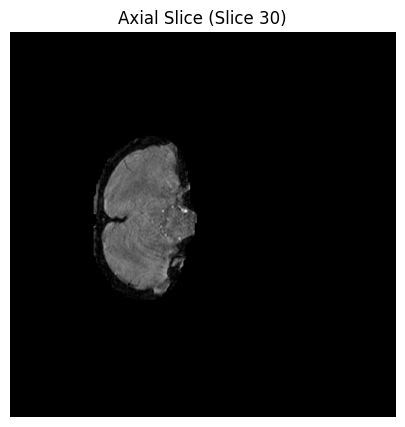

In [18]:
plot_mri_slice(raw_mri_list[12])

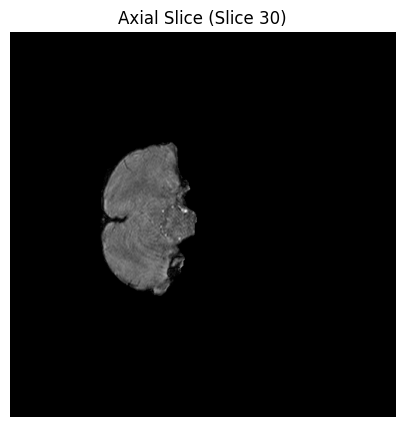

In [19]:
plot_mri_slice(preprocessed_mri_list[12])

### MRI slice sample from Cohort 3


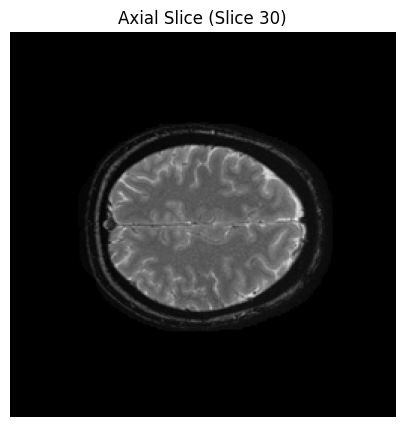

In [20]:
plot_mri_slice(raw_mri_list[65])

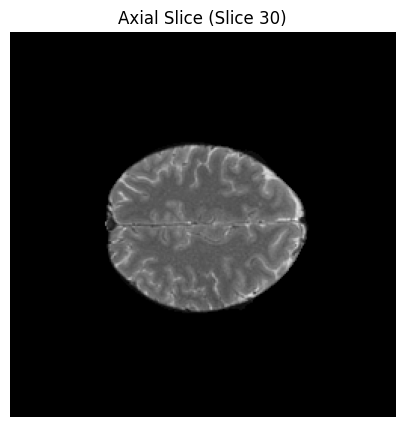

In [21]:
plot_mri_slice(preprocessed_mri_list[65])

### Check CMB masks


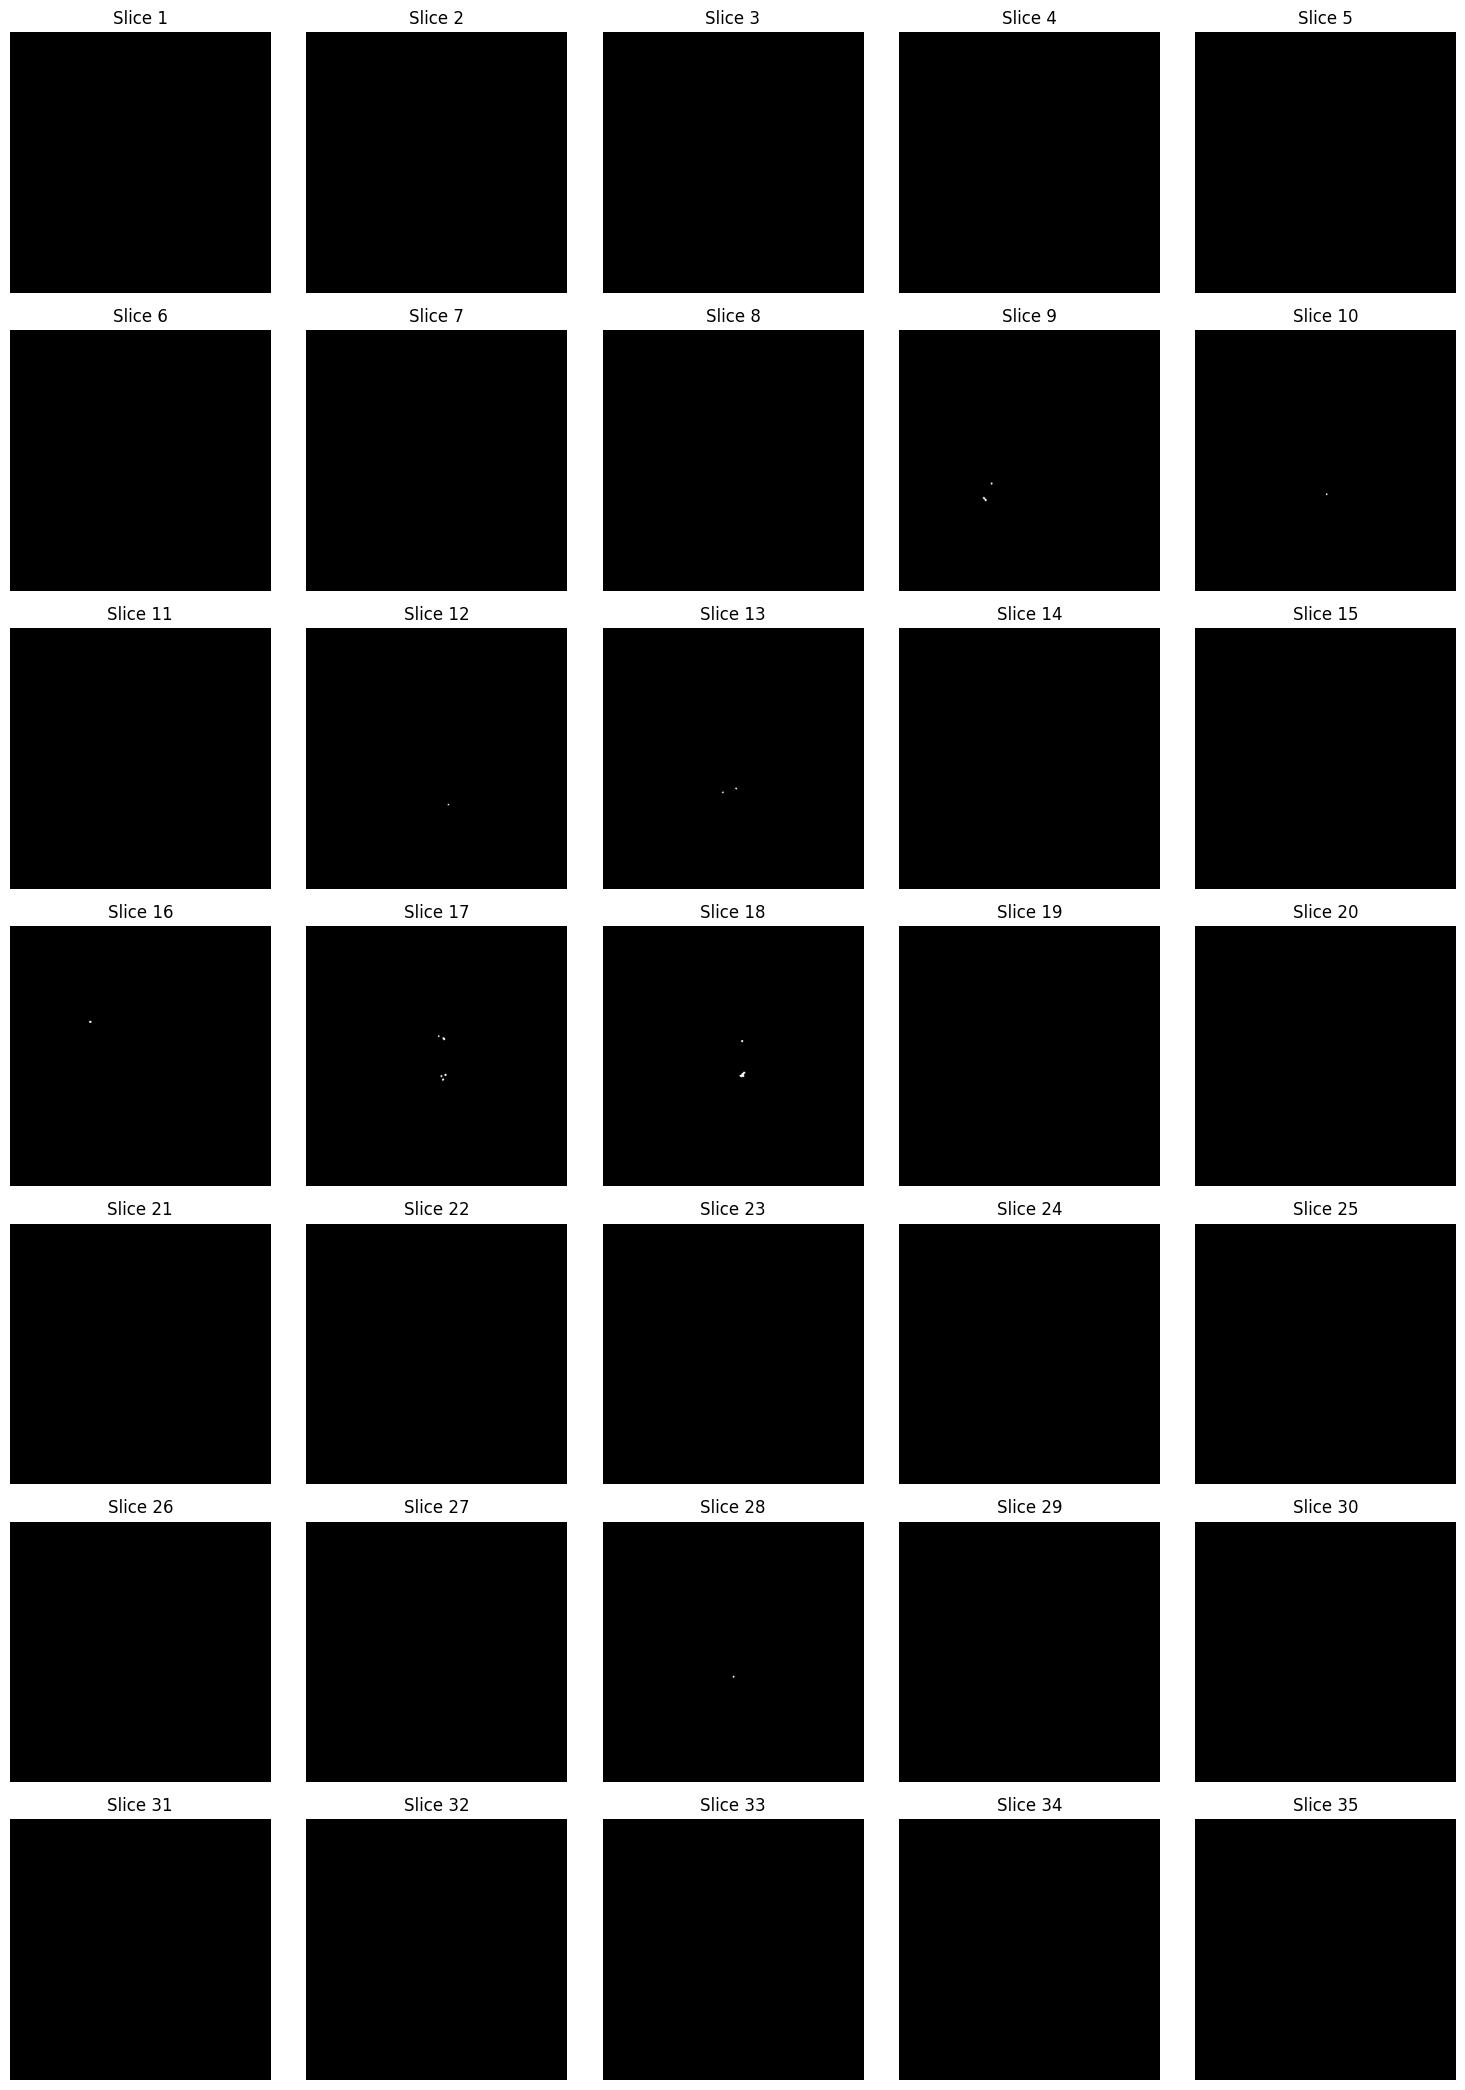

In [22]:
plot_all_slices(cmb_masks_list[0])

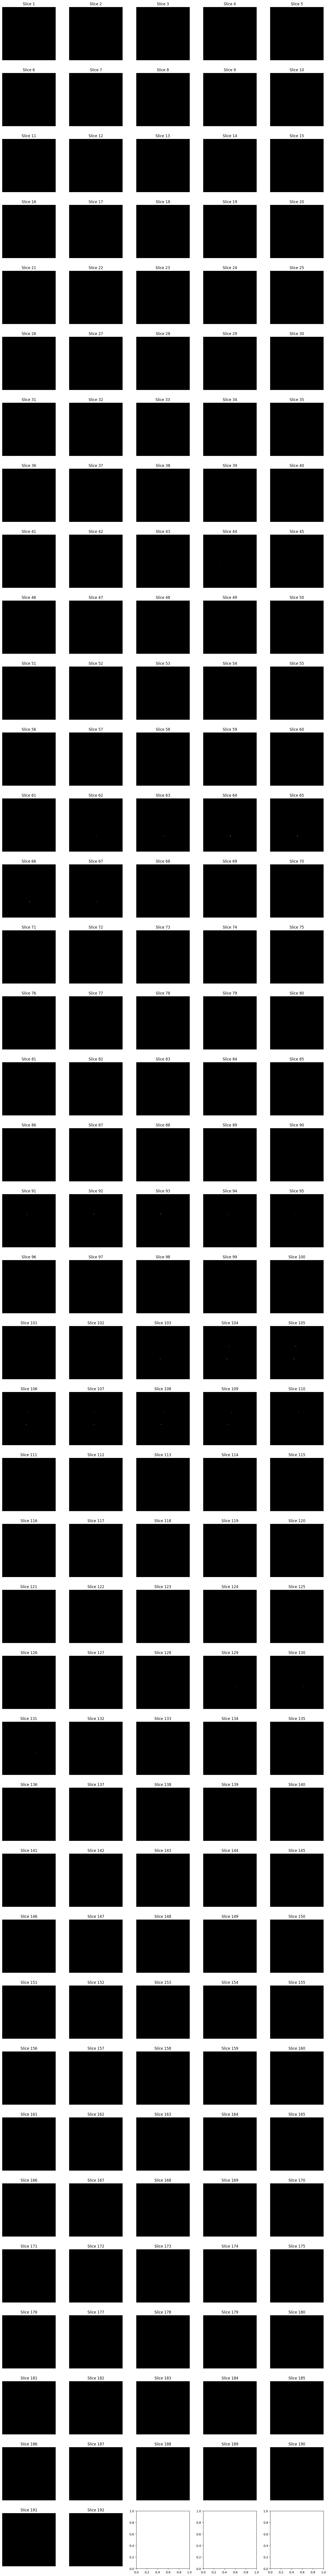

In [23]:
plot_all_slices(cmb_masks_list[17])

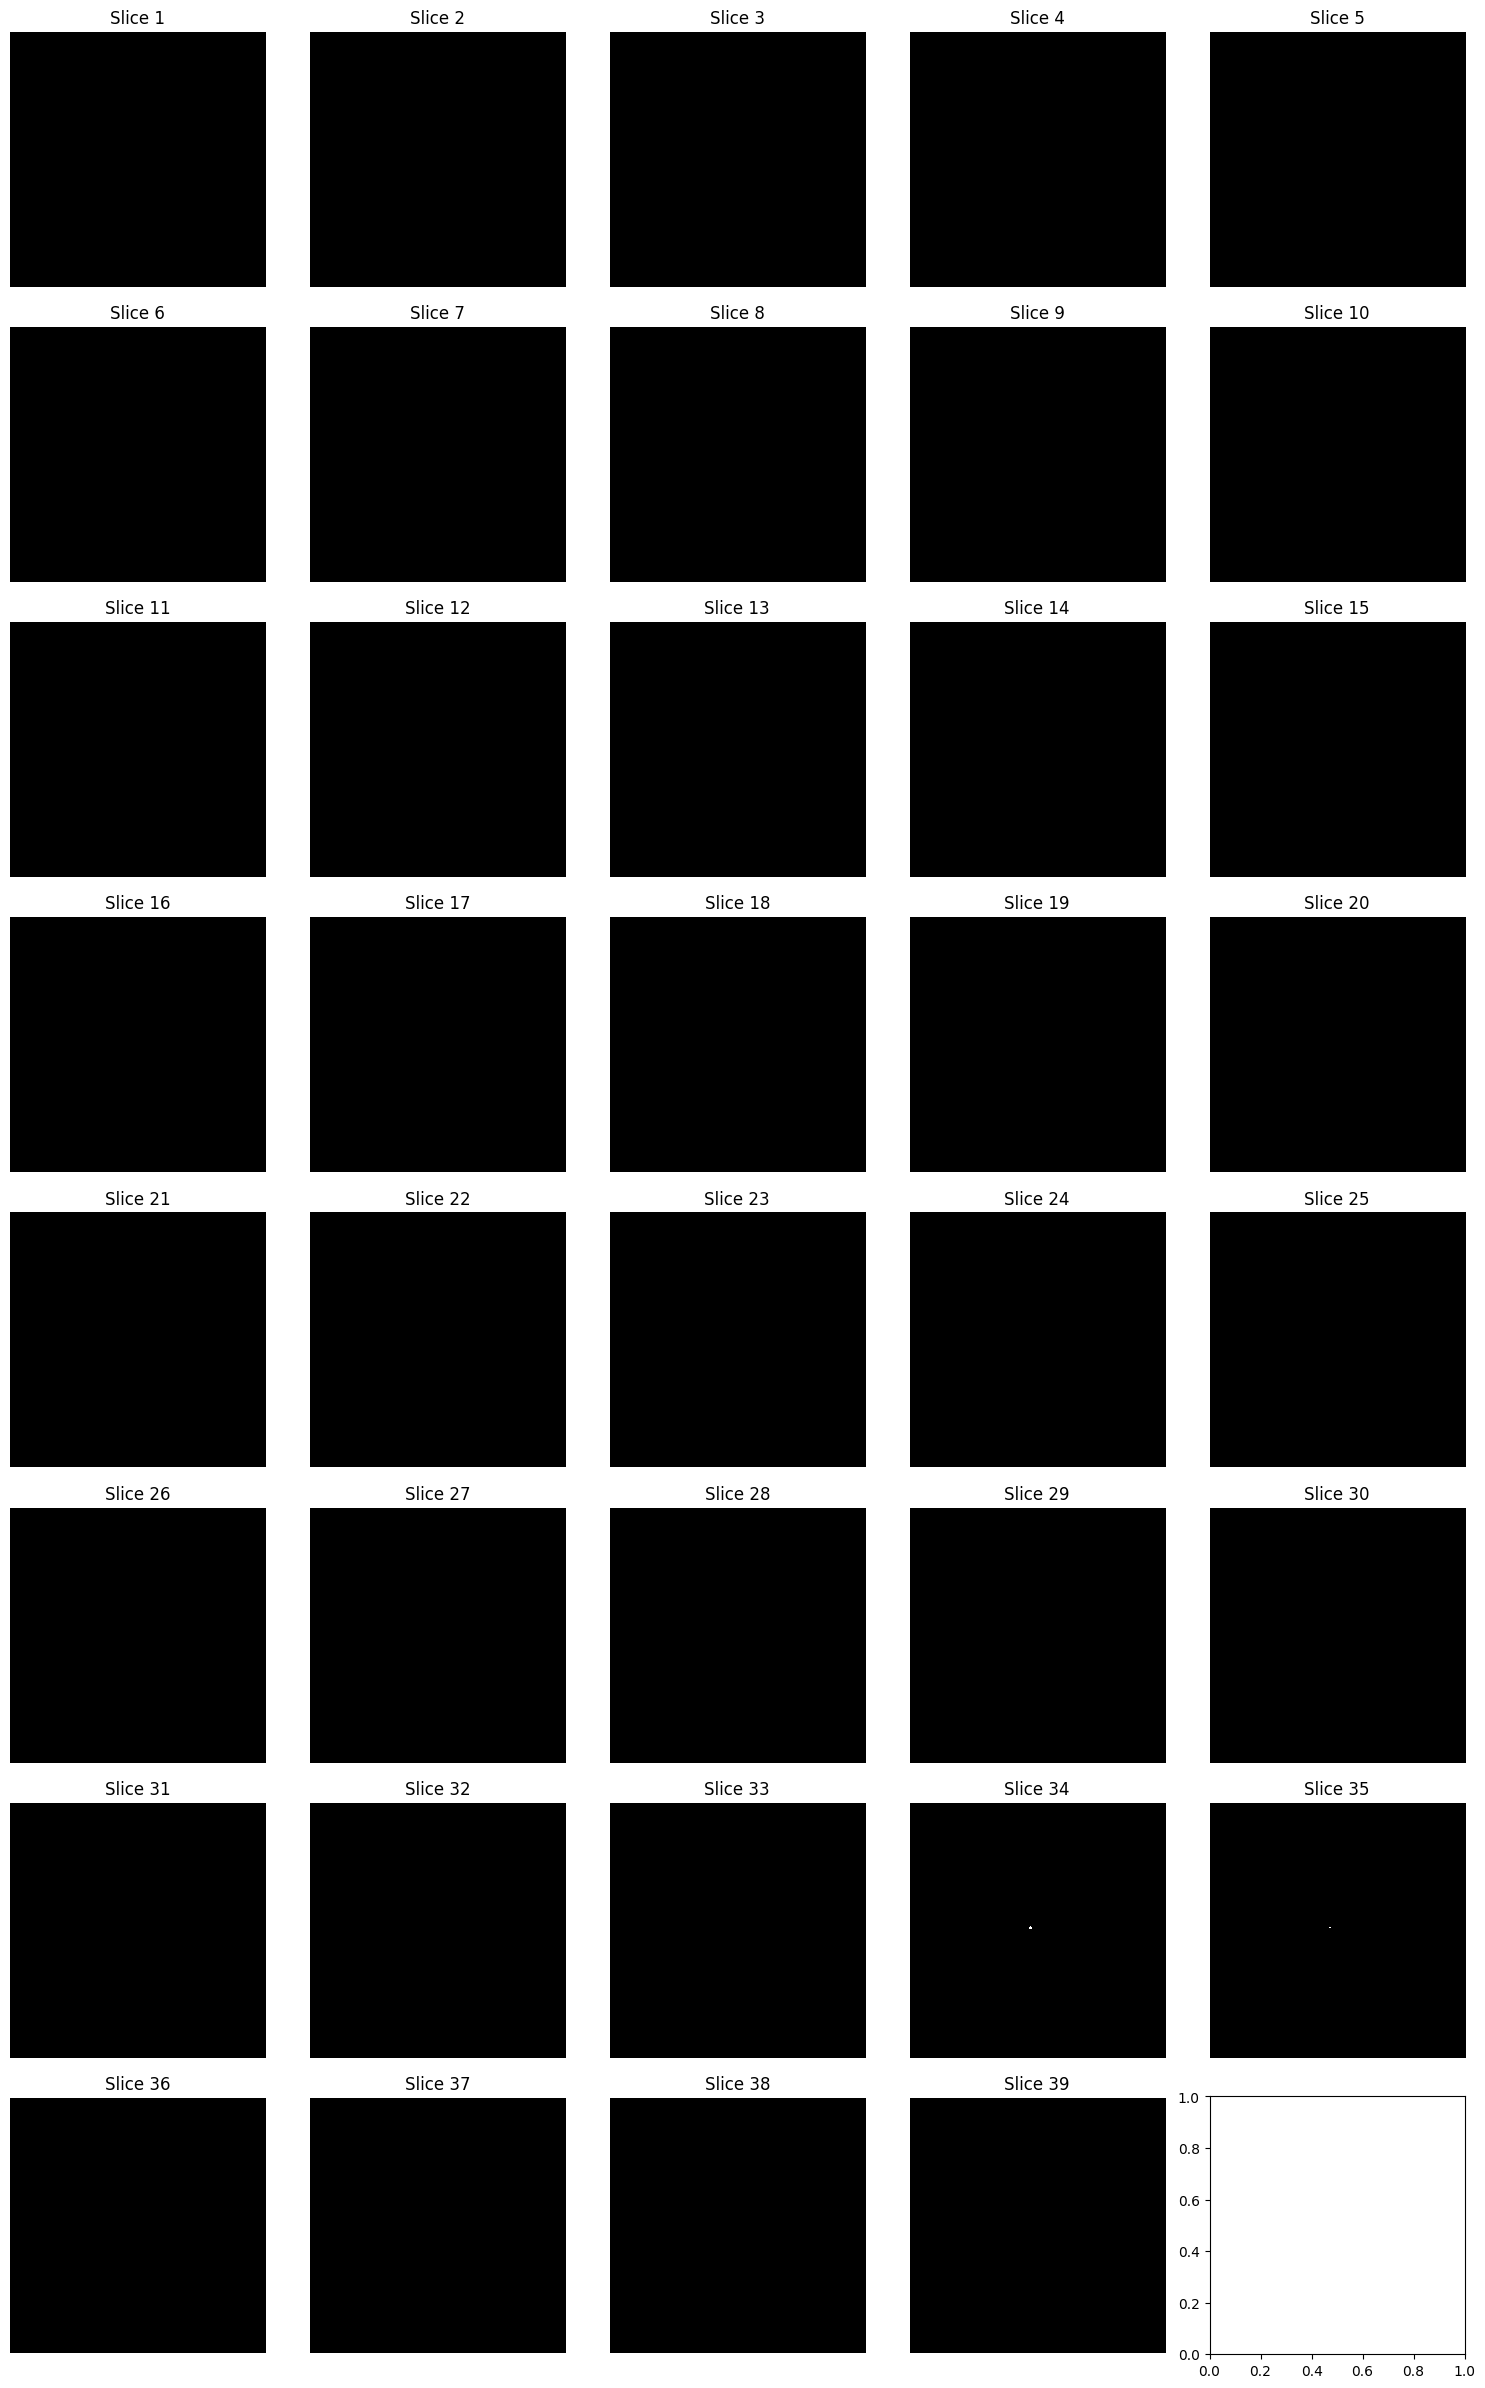

In [24]:
plot_all_slices(cmb_masks_list[50])